## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

##### 导入所需工具包

In [1]:
import numpy as np
import pandas as pd

import random

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline

##### 随机生成数据

In [2]:
def generate_random_data(shape=(20,2)):
    '''
    生成随机数据
    '''
    return np.random.random(shape)

In [3]:
def generate_regression_labels(X, range_=10, oscillate=5):
    '''
    生成回归标签
    ------------
    X: 数据
    range_: w和b的随机范围
    oscillate: 随机震荡范围
    '''
    # 获取单行数据的shape
    shape = X[0].shape
    # 随机生成 w 和 b
    w = np.random.random(shape) * range_
    b = np.random.random(1) * range_
    # 计算 y 值
    y = np.dot(X, w) + b
    # 向 y 中加入随机震荡
    y = [y_i + random.randint(-oscillate, oscillate) for y_i in y]
    # 转为nparray
    y = np.array(y)
    # 返回标签列表 y，以及参数 w 和 b
    return y, w, b

In [4]:
def generate_classification_labels(X, b = 2):
    '''
    生成分类标签
    ------------
    X: 数据
    b: 类别数目
    '''
    return [random.randint(0,b-1) for x_i in X]

生成数据

In [369]:
X = generate_random_data((30,1))

生成回归标签

In [370]:
y_r, w, b = generate_regression_labels(X, range_=10, oscillate=3)

In [371]:
y_r

array([ 5.01858513,  9.27677138,  6.64025586,  8.76637192,  8.5366664 ,
        9.55738689,  4.91813031,  5.00517201,  6.19681649,  9.86067981,
        7.38788226,  6.58967584,  7.56561088,  4.19636794,  9.93876668,
        3.87937662,  9.2833685 ,  7.91465236, 10.28239254, 10.39598494,
       10.25839162,  7.22234477,  8.60860106,  4.28409386,  5.3588084 ,
        9.17678926,  9.54962441,  9.09963566, 10.37667393,  7.47189926])

In [372]:
w, b

(array([1.02789403]), array([6.4319623]))

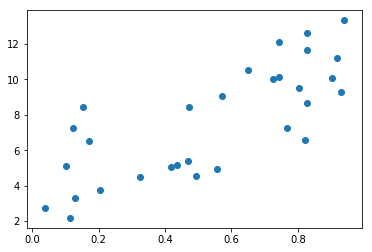

In [383]:
plt.scatter(X.reshape(-1),y_r)

生成分类标签

In [47]:
y_c = generate_classification_labels(X, 3)

In [48]:
y_c

[2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2]

##### 回归模型

In [522]:
class lr_model:
    '''
    线性回归模型
    '''
    def __init__(self, X = None, y = None):
        '''
        初始化模型，可以直接传入数据和标签进行训练
        '''
        self.lr = LinearRegression()
        self.trained = False
        if X and y:
            self.fit(X, y)
    
    def fit(self, X, y):
        '''
        模型训练
        '''
        self.lr.fit(X, y)
        # 记录数据
        self.dataset = (X, y)
        # 变为已训练状态
        self.trained = True
        
    def get_params(self):
        '''
        获取训练所得的最佳参数
        '''
        if self.trained:
            return self.lr.coef_, self.lr.intercept_
        else:
            print("Not trained yet")
        
    def score(self):
        '''
        获取模型打分
        '''
        return self.lr.score(self.dataset[0], self.dataset[1])
    
    def predict(self, X):
        '''
        预测
        '''
        if self.trained:
            return self.lr.predict(X)
        else:
            print("Not trained yet")
            
    def plot(self, plot_line=False, test_x=None, test_y=None):
        '''
        绘图
        ----
        ###只支持一维数据###
        '''
        X, y = self.dataset
        if self.trained:
            plt.scatter(X, y)
            # 传入测试数据，在图上画出黄色测试数据点
            if test_x is not None and test_y is not None:
                plt.scatter(test_x, test_y, c='yellow')
            # 是否画出回归线
            if plot_line:
                plt.plot(X.reshape(-1), self.predict(X), color='red')
        else:
            print("Not trained yet")

In [531]:
# 实例化模型
lr = lr_model()

In [532]:
# 生成训练数据
X = generate_random_data((50,1))

In [533]:
# 生成标签
y, w, b = generate_regression_labels(X, range_=15, oscillate=4)

In [534]:
# 分出测试数据
train_x = X[:40]
train_y = y[:40]
test_x = X[40:]
test_y = y[40:]

In [535]:
# 训练模型
lr.fit(train_x, train_y)

In [536]:
# 查看预测值与标签
lr.predict(train_x), train_y

(array([17.81099405, 12.16113706, 12.54944088,  7.76609445, 10.27412152,
        17.76928403,  6.48221304,  9.4738971 ,  8.94369661, 10.11706977,
        10.21881082, 10.10709191,  6.89651792,  9.42187157,  8.85244021,
        10.44378404,  9.0249608 , 16.51015322, 16.52498556, 11.01891577,
        13.1470464 , 13.49442159, 15.95906808, 17.95858508, 17.16981127,
        17.29776582, 17.7361918 , 10.34980076, 10.39349418,  8.91351341,
        12.24390687, 16.70869716, 17.86670921, 16.86060466, 17.01500288,
         8.21396499, 10.18473211, 10.50790762, 10.09221383, 10.38829172]),
 array([14.76794497, 13.9031245 ,  8.30620234,  3.34086108, 10.94431255,
        16.72464798,  7.00813106,  8.11364151, 10.56326817,  7.78128536,
         6.88689741,  7.77092786,  6.43819925, 13.05963654,  8.46853968,
        14.12043032,  8.64762427, 20.41761027, 15.43300694, 14.71744443,
        16.92654531, 11.2871373 , 16.84555767, 16.92115148, 19.10236673,
        14.23518964, 18.69029667,  7.02287121,  8

In [537]:
# 查看训练参数和生成标签用的参数
lr.get_params(), w, b

((array([12.46862787]), 5.4988146484585805),
 array([12.9430292]),
 array([4.98731673]))

In [538]:
# 查看模型得分
lr.score()

0.7053559817928664

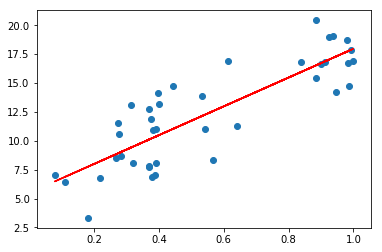

In [539]:
# 绘制图形
lr.plot(plot_line=True)

In [561]:
# 对测试数据进行预测
y_hat = lr.predict(test_x)

In [562]:
y_hat, test_y

(array([ 7.10469086, 15.52363957,  8.20856197, 17.40955948,  8.64784081,
         7.38159031, 17.59068392, 15.14204513, 14.37174536,  8.61395668]),
 array([ 7.65429267, 14.39356214, 11.80016342, 19.35123678,  8.25615577,
         9.94172748, 18.53925256, 11.99744895, 10.19784113,  5.22098242]))

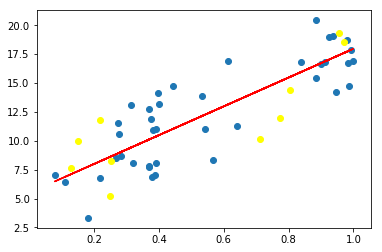

In [543]:
# 查看测试数据和训练数据分布差异
lr.plot(plot_line=True, test_x=test_x, test_y=test_y)

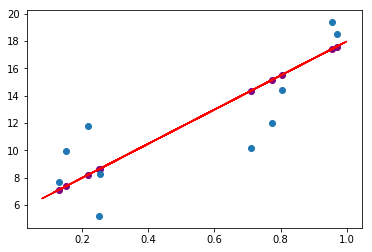

In [547]:
# 查看测试数据和预测结果差异
plt.scatter(test_x, y_hat, c='purple')
plt.scatter(test_x, test_y)
plt.plot(train_x.reshape(-1), lr.predict(train_x), color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [548]:
from scipy.spatial.distance import cosine

In [555]:
class knn_model:
    '''
    KNN 模型
    '''
    def __init__(self, X, y):
        '''
        初始化模型，保存训练数据
        '''
        self.dataset = [(x_i, y_i) for x_i, y_i in zip(X, y)]
        
    def distance(self, x1, x2, method):
        '''
        根据method参数使用对应方法计算距离
        默认L1距离
        '''
        if method == 'cosine':
            distance = cosine(x1, x2)
        elif method == 'L2':
            distance = np.sqrt(np.sum([pow(x, 2) for x in (x1 - x2)]))
        else:
            distance = np.abs(x1 - x2)
            if len(distance) > 1:
                distance = sum(distance)
        return distance
    
    def predict(self, x, k=5, dist_method='L1'):
        '''
        预测
        '''
        most_similars = sorted(self.dataset, key=lambda xi: self.distance(xi[0], x, dist_method))[:k]
        y_hats = [_y for x, _y in most_similars]
        return np.mean(y_hats)

In [556]:
# 实例化模型
knn = knn_model(train_x, train_y)

In [564]:
# 对测试数据进行预测
y_hat_knn = [knn.predict(x_i) for x_i in test_x]

In [565]:
# 查看预测结果与标签差异
y_hat_knn, test_y

([6.412300615825352,
  17.220255752655923,
  8.142075500347707,
  17.538833853937383,
  9.203428138183195,
  6.412300615825352,
  16.44877184293278,
  16.12140410344715,
  12.870897224238377,
  9.203428138183193],
 array([ 7.65429267, 14.39356214, 11.80016342, 19.35123678,  8.25615577,
         9.94172748, 18.53925256, 11.99744895, 10.19784113,  5.22098242]))

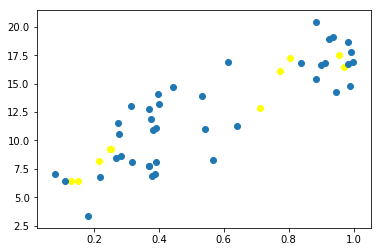

In [567]:
# 查看训练数据和测试数据预测结果的分布
plt.scatter(test_x, y_hat_knn, c='yellow')
plt.scatter(train_x, train_y)

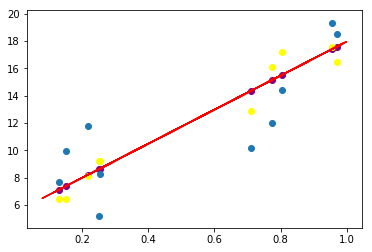

In [566]:
# 查看和线性回归预测结果的差异
plt.scatter(test_x, y_hat, c='purple') # 线性回归预测结果
plt.scatter(test_x, y_hat_knn, c='yellow') # knn预测结果
plt.scatter(test_x, test_y) # 真实标签
plt.plot(train_x.reshape(-1), lr.predict(train_x), color='red') # 回归线

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [29]:
from collections import Counter
import pdb

In [6]:
class Node:
    '''
    决策树节点类
    '''
    def __init__(self, attr, val, result=None):
        '''
        初始化节点，记录划分点属性和值，以及节点分类结果
        '''
        self.attr = attr
        self.val = val
        self.result = result
        self.left = None
        self.right = None
    
    def __str__(self):
        return "attr:'{}',val:'{}',result:'{}',has-left:{},has-right:{}".format(self.attr, self.val, self.result, self.left != None, self.right != None)

In [240]:
class decision_tree_model:
    '''
    决策树模型，默认左侧分支为True
    '''
    def __init__(self, data, target):
        '''
        初始化模型
        '''
        self.data = data
        self.target = target
        self.attrs = set(data.columns.tolist()) - {target}
        self.tree = self.build_tree(data)
    
    def entropy(self, elements):
        '''
        计算熵值
        '''
        counter = Counter(elements)
        probs = [counter[c] / len(elements) for c in set(elements)]
        return - sum(p * np.log(p) for p in probs)
    
    def find_optimal_spliter(self, data):
        '''
        寻找最佳切分点
        '''
        spliter = None
        min_entropy = float('inf')
        for attr in self.attrs:
            values = set(data[attr])
            for val in values:
                subset_1 = data[data[attr] == val][self.target]
                subset_2 = data[data[attr] != val][self.target]
                
                entropy_1 = self.entropy(subset_1)
                entropy_2 = self.entropy(subset_2)
                
                entropy_total = entropy_1 + entropy_2
                
                ###########这里不确定是不是需要做处理##############
                # 处理[M:0,M:0,F:0,F:1]不会以gender再划分一次的问题
                # 因为[0,0,0,1] 比 [0,0] [0,1]的熵值小，所以会少分一次
                if len(subset_1) == len(data) or len(subset_2) == len(data):
                    entropy_total += 100
                
                if entropy_total <= min_entropy:
                    spliter = (attr, val)
                    min_entropy = entropy_total
                    
        return spliter
    
    def build_tree(self, data):
        '''
        递归建立决策树
        '''
        # 分支无数据，返回空
        if data.empty:
            return None
        # 分支数据已不需要分割，返回结果节点
        if len(set(data[self.target])) < 2:
            return Node("","",data.iloc[0][self.target])
        # 找到切分点
        spliter = self.find_optimal_spliter(data)
        # 建立当前节点
        attr = spliter[0]
        val = spliter[1]
        node = Node(attr, val)
        # 切分数据
        left_set = data[data[attr] == val]
        right_set = data[data[attr] != val]
        # 如果没有切分，即无法再分割，投票决定节点类别
        if left_set.empty or right_set.empty:
            c = Counter(data[self.target])
            node.result = c.most_common()[0][0]
            return node
        # 对左右分支递归建树
        node.left = self.build_tree(left_set)
        node.right = self.build_tree(right_set)
        # 返回当前节点
        return node

测试

In [241]:
# 模拟数据
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [242]:
# 转为DataFrame
dataset = pd.DataFrame.from_dict(mock_data)

In [243]:
# 实例化模型
dt = decision_tree_model(dataset, 'bought')

In [244]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


检查树分支

In [245]:
# 根节点
print(dt.tree)

attr:'income',val:'+10',result:'None',has-left:True,has-right:True


In [246]:
## 根节点的左侧节点有子节点，继续划分，划分依据为family_number是否等于 2
print(dt.tree.left)

attr:'family_number',val:'2',result:'None',has-left:True,has-right:True


In [247]:
## 根节点的右侧节点有result属性，且没有划分点信息，表示是叶节点，income != +10 时，bought会预测为1
print(dt.tree.right)

attr:'',val:'',result:'1',has-left:False,has-right:False


In [248]:
### family_number = 2 且 income = +10，bought预测为1
print(dt.tree.left.left)

attr:'',val:'',result:'1',has-left:False,has-right:False


In [249]:
### 划分依据为 gender是否等于 M
print(dt.tree.left.right)

attr:'gender',val:'M',result:'None',has-left:True,has-right:True


In [250]:
#### family_number = 2，income = +10 且 gender = M 时，bought预测为0
print(dt.tree.left.right.left)

attr:'',val:'',result:'0',has-left:False,has-right:False


In [251]:
#### 有result，且有划分点，表示该节点无法继续划分，投票得出分类为1
print(dt.tree.left.right.right)

attr:'income',val:'+10',result:'1',has-left:False,has-right:False


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [100]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [124]:
class k_means_model:
    '''
    KMeans模型
    '''
    def __init__(self, k=6, max_iter=500):
        '''
        初始化模型
        '''
        self.kmeans = KMeans(n_clusters=k, max_iter=max_iter)
    
    def generate_data(self, n=100):
        '''
        随机生成二维数据
        '''
        X1 = [random.randint(0, 100) for _ in range(n)]
        X2 = [random.randint(0, 100) for _ in range(n)]
        # 转换为dataframe
        self.training_data = pd.DataFrame(data={"X1":X1,"X2":X2})
        self.plot_data()
        
    def plot_data(self):
        '''
        打印数据
        '''
        plt.scatter(self.training_data['X1'],self.training_data['X2'])
        
    def plot_result(self):
        '''
        绘制聚类结果
        '''
        centers = defaultdict(list)
        for label, location in zip(self.kmeans.labels_, self.training_data.iterrows()):
            centers[label].append(list(location[1]))
            
        color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

        for i, c in enumerate(centers):
            for location in centers[c]:
                plt.scatter(*location, c=color[i])

        for center in self.kmeans.cluster_centers_:
            plt.scatter(*center, s=100)
        
    def fit(self):
        '''
        训练模型
        '''
        self.kmeans.fit(self.training_data)
        
    def get_centers(self):
        '''
        获取聚类中心点
        '''
        return self.kmeans.cluster_centers_
    
    def get_labels(self):
        '''
        获取训练数据聚类结果
        '''
        return self.kmeans.labels_

In [125]:
# 实例化模型
kmeans = k_means_model()

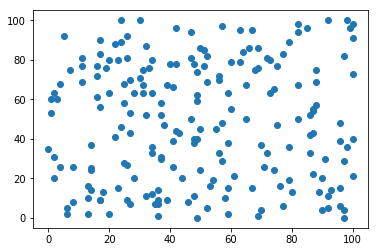

In [126]:
# 随机生成数据
kmeans.generate_data(200)

In [127]:
# 训练模型
kmeans.fit()

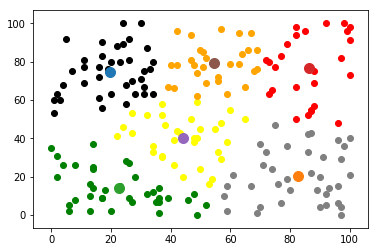

In [128]:
# 画出聚类结果
kmeans.plot_result()

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:A model is a function which describes the problem solution mathematically. All models are wrong because there's always some random factors in the actual problems, therefore no function can perfectly model all data patterns in the problem, but the models can always give a relatively close answer and a higher accuracy than random guessing, hence some of them can be extremely useful.

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:Underfitting means that the model lacks training and has a higher bias, whereas overfitting indicates the model tried too hard to fit the training data with higher variance(worse generalization capability).   
A low training iteration number or a small learning rate always leads to underfitting, and overfitting often happens when the model is too complicated and fits every training data points perfectly.

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:All of these terms refer to machine learning model evaluation methods based on confusion matrix, their main goal is to evaluate the current model and help it to find the best model structure or optimal hyper parameters.  
P: positive , N: negative  
T: true , F: false  
$Precision=\frac{TP}{TP+FP}$, it mainly focus on ensuring the data marked positive is actually positive;  
$Recul=\frac{TP}{TP+FN}$, it focus on the opposite side of precision, which is that how many positive data are marked as positive; 

P: precision, R: recall  
$F-Score=(1+\beta^2)\frac{PR}{\beta^2 P+R}$, it considers both precision and recall, and uses $\beta$ to control the tradeoff between them. When $\beta$ equals 1, it is called F1 score or the harmonic mean of P and R, where P and R has the same weight, P will become more important when $\beta$ is less than 1 and vice versa. When $\beta$ equals 2, it is F2 score, and the importance of R is twice of P.  
AUC also includes both P and R, it calculates the area under the ROC curve, ROC curve is drawn with $FPR=\frac{FP}{FP+TN}$ as the x-axis and $TPR=\frac{TP}{TP+FN}$ as the y-axis.

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:Machine learning can model problems based on the existing data and predict the result of newly generated data, and when the data changed, the model can work with only a little change on its parameters or structure; whereas the traditional analytical programing needs more data analysation and code changes.

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans:Different evaluations has different focuses, a wrong evaluation method may lead the model to the wrong direction.

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [258]:
class decision_tree_model:
    '''
    决策树模型，默认左侧分支为True
    '''
    def __init__(self, data, target):
        '''
        初始化模型
        '''
        self.data = data
        self.target = target
        self.attrs = set(data.columns.tolist()) - {target}
        self.tree = self.build_tree(data)
    
    def entropy(self, elements):
        '''
        计算熵值
        '''
        counter = Counter(elements)
        probs = [counter[c] / len(elements) for c in set(elements)]
        return - sum(p * np.log(p) for p in probs)
    
    def find_optimal_spliter(self, data):
        '''
        寻找最佳切分点
        '''
        spliter = None
        min_entropy = float('inf')
        for attr in self.attrs:
            values = set(data[attr])
            for val in values:
                subset_1 = data[data[attr] == val][self.target]
                subset_2 = data[data[attr] != val][self.target]
                
                entropy_1 = self.entropy(subset_1)
                entropy_2 = self.entropy(subset_2)
                
                entropy_total = entropy_1 + entropy_2
                
                ###########这里不确定是不是需要做处理##############
                # 处理[M:0,M:0,F:0,F:1]不会以gender再划分一次的问题
                # 因为[0,0,0,1] 比 [0,0] [0,1]的熵值小，所以会少分一次
                if len(subset_1) == len(data) or len(subset_2) == len(data):
                    entropy_total += 100
                
                if entropy_total <= min_entropy:
                    spliter = (attr, val)
                    min_entropy = entropy_total
                    
        return spliter
    
    def build_tree(self, data):
        '''
        递归建立决策树
        '''
        # 分支无数据，返回空
        if data.empty:
            return None
        # 分支数据已不需要分割，返回结果节点
        if len(set(data[self.target])) < 2:
            return Node("","",data.iloc[0][self.target])
        # 找到切分点
        spliter = self.find_optimal_spliter(data)
        # 建立当前节点
        attr = spliter[0]
        val = spliter[1]
        node = Node(attr, val)
        # 切分数据
        left_set = data[data[attr] == val]
        right_set = data[data[attr] != val]
        # 如果没有切分，即无法再分割，投票决定节点类别
        if left_set.empty or right_set.empty:
            c = Counter(data[self.target])
            node.result = c.most_common()[0][0]
            return node
        # 对左右分支递归建树
        node.left = self.build_tree(left_set)
        node.right = self.build_tree(right_set)
        # 返回当前节点
        return node
    
    ### 以下为新增部分 ###
    def predicate(self, gender, income, family_number):
        '''
        预测入口
        '''
        return self.predict(self.tree, gender, income, family_number)
    
    def predict(self, node, gender, income, family_number):
        '''
        寻找对应的分组节点
        '''
        # pdb.set_trace()
        # 找到了有预测结果的节点，直接返回
        if node.result != None:
            print("返回预测结果")
            return node.result
        # 取出节点信息
        attr = node.attr
        val = node.val
        # 是否与节点信息匹配
        matched = False
        if attr == 'gender':
            matched = val == gender
        elif attr == 'income':
            matched = val == income
        else:
            matched = val == family_number
        # 判断分支
        if matched:
            if node.left:
                print("{}={},走左侧分支".format(attr,val))
                return self.predict(node.left, gender, income, family_number)
            else:
                return None
        elif node.right:
            print("{}!={},走右侧分支".format(attr,val))
            return self.predict(node.right, gender, income, family_number)
        else:
            return None

In [259]:
# 模拟数据
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

# 转为DataFrame
dataset = pd.DataFrame.from_dict(mock_data)

In [260]:
# 实例化模型
dt = decision_tree_model(dataset, 'bought')

测试

In [261]:
#树结构如下：
#                   income = +10?  
#               True/           \False
#     family_number = 2?       result-1
#  True/            \False
# result-1      gender = M?
#           True/       \False
#          result-0    non-split-1

In [262]:
dt.predicate('F','-10',1)

income!=+10,走右侧分支
返回预测结果


1

In [263]:
dt.predicate('F','+10',1)

income=+10,走左侧分支
family_number!=2,走右侧分支
gender!=M,走右侧分支
返回预测结果


1

In [264]:
dt.predicate('F','+10',2)

income=+10,走左侧分支
family_number=2,走左侧分支
返回预测结果


1

In [265]:
dt.predicate('M','+10',1)

income=+10,走左侧分支
family_number!=2,走右侧分支
gender=M,走左侧分支
返回预测结果


0

测试不在数据集中的数据

In [266]:
dt.predicate('F','-10',2)

income!=+10,走右侧分支
返回预测结果


1

In [267]:
dt.predicate('M','+10',2)

income=+10,走左侧分支
family_number=2,走左侧分支
返回预测结果


1

In [268]:
dt.predicate('M','-10',1)

income!=+10,走右侧分支
返回预测结果


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [172]:
from sklearn.datasets import load_boston
import random

In [312]:
class lr_model:
    '''
    线性回归模型
    '''
    def __init__(self):
        '''
        初始化模型
        '''
        dataset = load_boston()
        X, self.y = dataset['data'],dataset['target']
        # 取出第5列，即 RM 列
        self.X_rm = X[:,5]
        self.k = random.random() * 2 - 1  # -1 1
        self.b = random.random() * 2 - 1  # -1 1
        plt.scatter(self.X_rm,self.y)
        
    def fit(self, learning_rate=1e-2, iteration_num=500):
        '''
        模型训练
        '''
        losses = []
        k = self.k
        b = self.b
        for i in range(iteration_num):
            # 对每行数据计算对应的 y_hat
            price_use_current_parameters = [self.predict(x, k, b) for x in self.X_rm]

            # 计算损失
            current_loss = self.loss(self.y, price_use_current_parameters)
            losses.append(current_loss)
            if i % 10 == 0:
                print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))

            # 计算梯度
            k_gradient = self.partial_derivative_k(self.X_rm, self.y, price_use_current_parameters)
            b_gradient = self.partial_derivative_b(self.y, price_use_current_parameters)

            # 更新参数（向负梯度方向走一步，步长为 learning_rate）
            k = k + (-1 * k_gradient) * learning_rate
            b = b + (-1 * b_gradient) * learning_rate
            
        # 记录模型参数
        self.k = k
        self.b = b
        # 画出loss变化
        plt.plot(list(range(iteration_num)),losses)
        print("训练完成")
        
    def loss(self, y, y_hat):
        '''
        MAE loss
        '''
        return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
    
    def partial_derivative_k(self, x, y, y_hat):
        n = len(y)
        gradient = 0
        for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
            # 绝对值求导
            sign = 1
            if y_i - y_hat_i < 0:
                sign = -1
            gradient += sign * -x_i
        return 1/n * gradient

    def partial_derivative_b(self, y, y_hat):
        n = len(y)
        gradient = 0
        for y_i, y_hat_i in zip(list(y), list(y_hat)):
            # 绝对值求导
            sign = 1
            if y_i - y_hat_i < 0:
                sign = -1
            gradient += sign
        return 1/n * gradient
    
    def predict(self, X, k, b):
        '''
        预测
        '''
        return k * X + b
            
    def plot(self):
        '''
        绘图
        '''
        price_use_best_parameters = [self.predict(x, self.k, self.b) for x in self.X_rm]
        plt.scatter(self.X_rm, self.y)
        plt.scatter(self.X_rm, price_use_best_parameters)

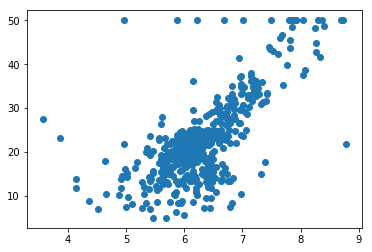

In [313]:
lr = lr_model()

Iteration 0, the loss is 21.05619685636966, parameters k is 0.10930766835316974 and b is 0.7896507364074521
Iteration 10, the loss is 17.206533918101204, parameters k is 0.7377711070883483 and b is 0.689650736407452
Iteration 20, the loss is 13.518742050798195, parameters k is 1.3536810280369656 and b is 0.591745598067531
Iteration 30, the loss is 10.377693788886662, parameters k is 1.9225684588670058 and b is 0.5017851237592308
Iteration 40, the loss is 8.163893289283937, parameters k is 2.4007362849539637 and b is 0.4268444122967803
Iteration 50, the loss is 6.781490413760064, parameters k is 2.7788334786298536 and b is 0.3683463885813652
Iteration 60, the loss is 5.941585351591651, parameters k is 3.073029051752383 and b is 0.32411713956950755
Iteration 70, the loss is 5.579954378432641, parameters k is 3.2654650596575214 and b is 0.29692346368017947
Iteration 80, the loss is 5.460607051418521, parameters k is 3.375097549776099 and b is 0.2835637798857131
Iteration 90, the loss is 5

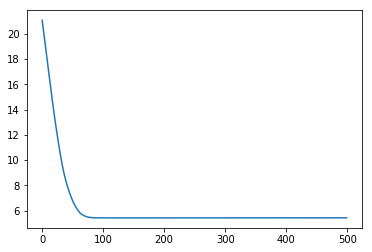

In [314]:
lr.fit()

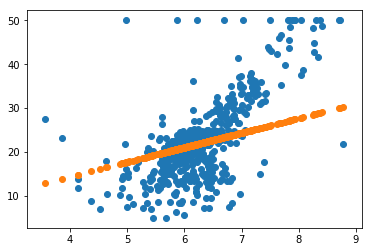

In [302]:
lr.plot()

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)